In [1]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import os

In [4]:
EEG_PATH = "/srv/eeg_reconstruction/shared/biosemi-dataset/eeg2/preprocessed_eeg"

def getSubChannels(subject = "sub-01", split="test"):
    fpath = os.path.join(EEG_PATH, subject, f"preprocessed_eeg_{split}.npy")
    data = np.load(fpath, allow_pickle=True)
    ch_names = data['ch_names']
    return ch_names


def getSubEeg(subject = "sub-01", split="test"):
    print("Getting eeg data for", subject)
    fpath = os.path.join(EEG_PATH, subject, f"preprocessed_eeg_{split}.npy")
    # load EEGs
    data = np.load(fpath, allow_pickle=True)
    preprocessed_eeg_data = data['preprocessed_eeg_data']
    return np.array(preprocessed_eeg_data)

subjects = os.listdir(EEG_PATH)
eegData = np.array([getSubEeg(sub, "training") for sub in subjects])

channels = getSubChannels(subjects[0], "training")

Getting eeg data for sub-05
Getting eeg data for sub-06
Getting eeg data for sub-02
Getting eeg data for sub-03
Getting eeg data for sub-07
Getting eeg data for sub-04
Getting eeg data for sub-01
Getting eeg data for sub-08


In [5]:
# P1 ERP component, should have positive polarity
time_win = (.080, .140)
electrodes = ('O1', 'O2', 'PO7', 'PO8', 'Pz', 'P3', 'P4')
roi = [channels.index(e) for e in electrodes]

In [6]:
eegData.shape
# participants, classes, repetitions, channels, time steps

(8, 768, 4, 64, 309)

## Inter-subject t test

In [10]:
# Return the diff of mean of responses to two different image conditions
def getSubAvgDiff(eeg, trials, image1Index, image2Index):
    epochs_data1 = eeg[image1Index] # first image
    evoked_data1 = np.mean(epochs_data1[:trials], axis=0) # average across trials

    epochs_data2 = eeg[image2Index] # second image
    evoked_data2 = np.mean(epochs_data2[:trials], axis=0)

    diff_waves = evoked_data1 - evoked_data2
    return diff_waves


In [7]:
# randomly sample 1000 image pairs

import random

numClasses = len(eegData[0])
image_pairs = []

while len(image_pairs) < 1000:
    pair = random.sample(range(numClasses), 2)
    image_pairs.append(pair)

print(image_pairs)

[[554, 655], [297, 39], [532, 345], [464, 105], [738, 562], [295, 540], [107, 721], [450, 654], [401, 752], [476, 540], [404, 19], [658, 57], [558, 78], [40, 278], [462, 565], [549, 331], [200, 664], [408, 216], [87, 253], [388, 729], [498, 204], [557, 323], [243, 98], [153, 349], [73, 577], [418, 344], [323, 736], [215, 492], [576, 275], [29, 657], [63, 574], [278, 349], [310, 507], [381, 658], [96, 587], [627, 569], [126, 711], [485, 3], [186, 634], [40, 374], [516, 385], [597, 502], [158, 665], [94, 681], [416, 169], [98, 265], [80, 154], [434, 234], [467, 308], [570, 311], [104, 174], [736, 564], [532, 174], [762, 157], [726, 159], [465, 449], [431, 177], [563, 139], [218, 631], [166, 310], [239, 32], [467, 553], [66, 499], [311, 677], [645, 326], [63, 409], [616, 88], [703, 293], [227, 619], [719, 65], [179, 368], [229, 576], [352, 117], [352, 550], [504, 533], [469, 733], [310, 268], [299, 722], [618, 270], [264, 708], [607, 118], [412, 5], [752, 733], [650, 406], [319, 616], [63

In [21]:
EEG_PATH = "/srv/eeg_reconstruction/shared/biosemi-dataset/eeg2"

fpath = os.path.join(EEG_PATH, "shared1000_indices.npy")
map_data = np.load(fpath, allow_pickle=True)

In [22]:
print(len(map_data))

1000


In [24]:
subjectCount = len(eegData)

tvals = []
pvals = []

for pair in image_pairs:
    differences = np.array([getSubAvgDiff(eegData[i], 4, pair[0], pair[1]) for i in range(subjectCount)])
    #print(differences.shape) #(10, 63, 250)
    y = differences[:, roi, int(time_win[0]*250) : int(time_win[1]*250)]
    y = np.mean(y, axis=2)
    #print(y.shape) #(10, 7)
    t, pval = stats.ttest_1samp(y, 0)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))

    if (pval[0] > 0.99):
        print('IMAGE IDS WITH P VAL: ' + str(pval[0]))
        print(map_data[pair[0]])
        print(map_data[pair[1]])


IMAGE IDS WITH P VAL: 0.9950295877727866
65029
268114
IMAGE IDS WITH P VAL: 0.9954714127336696
575164
566341
IMAGE IDS WITH P VAL: 0.998927156945288
318444
2372
IMAGE IDS WITH P VAL: 0.99818128440809
576789
5028
IMAGE IDS WITH P VAL: 0.9964205513880222
354095
170917
IMAGE IDS WITH P VAL: 0.9962800621455433
361648
11358
IMAGE IDS WITH P VAL: 0.9924666572110953
51774
204969
IMAGE IDS WITH P VAL: 0.9949954653436381
81365
576749
IMAGE IDS WITH P VAL: 0.9930978169192449
116603
176873


In [12]:
pvals

[0.5361,
 0.995,
 0.0954,
 0.1301,
 0.1455,
 0.5633,
 0.3539,
 0.8092,
 0.1481,
 0.7143,
 0.6509,
 0.8113,
 0.3683,
 0.1595,
 0.7981,
 0.5859,
 0.9686,
 0.8843,
 0.7996,
 0.5075,
 0.9955,
 0.038,
 0.2771,
 0.8094,
 0.7816,
 0.645,
 0.344,
 0.5413,
 0.0687,
 0.1156,
 0.7323,
 0.5083,
 0.4781,
 0.0994,
 0.0672,
 0.0481,
 0.4272,
 0.4137,
 0.4374,
 0.5789,
 0.7108,
 0.2922,
 0.4729,
 0.6717,
 0.8019,
 0.4221,
 0.0071,
 0.6915,
 0.7839,
 0.1838,
 0.8034,
 0.9516,
 0.98,
 0.9749,
 0.3453,
 0.8496,
 0.4483,
 0.3843,
 0.2183,
 0.4227,
 0.8455,
 0.1522,
 0.6773,
 0.8237,
 0.0827,
 0.1239,
 0.065,
 0.9318,
 0.2357,
 0.7857,
 0.4887,
 0.2267,
 0.2849,
 0.3593,
 0.9172,
 0.9345,
 0.2174,
 0.7013,
 0.4148,
 0.1919,
 0.5028,
 0.4576,
 0.0159,
 0.2181,
 0.4951,
 0.4103,
 0.2302,
 0.9668,
 0.1291,
 0.7254,
 0.8977,
 0.5319,
 0.1227,
 0.0406,
 0.6317,
 0.4416,
 0.8804,
 0.8327,
 0.236,
 0.9282,
 0.0806,
 0.4674,
 0.9176,
 0.0575,
 0.0395,
 0.0602,
 0.7844,
 0.5521,
 0.487,
 0.0449,
 0.2051,
 0.5681,
 

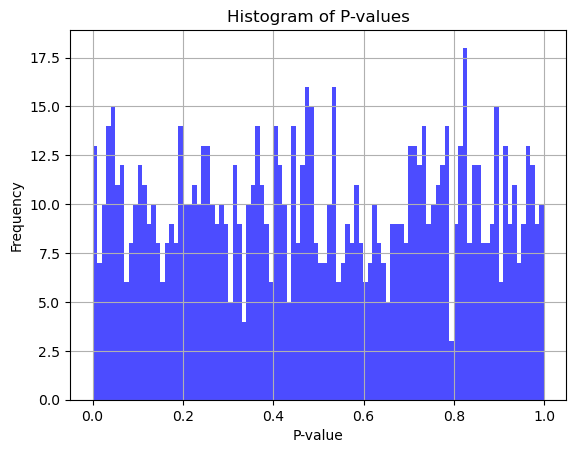

In [13]:
plt.hist(pvals, bins=100, color='blue', alpha=0.7)
plt.title('Histogram of P-values')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [18]:
EEG_PATH = "/srv/eeg_reconstruction/shared/biosemi-dataset/eeg2"

fpath = os.path.join(EEG_PATH, "shared1000_indices.npy")
map_data = np.load(fpath, allow_pickle=True)

In [19]:
map_data

array([262145, 262239, 262414, 524646, 262690,    584,    605,    625,
          650,   1308, 263599, 525790, 525932, 264244, 264396,   2270,
         2372, 264735, 526968, 526980, 274108, 265023, 265150, 265453,
       527618,   3521, 265745, 558788, 393907,   4442, 266622,   5028,
       267338,   5277, 267647, 267699,   5684, 312536, 268008, 268114,
       268418, 268659,   6765,   7048, 531392, 531515, 531828,  11299,
       219750,   7932,   8027,   8053, 270278, 532753, 533231,   8998,
         1625, 534259,  10046,  10710, 272901,  10903, 273120, 273138,
       273147, 273250,  11358, 535871,  11856, 536786, 536884, 274978,
       537393, 275663, 399878, 275902, 275938,  13969, 276664, 538822,
       539340, 539395, 277524, 570543, 539705, 539879, 300383, 540538,
        16314, 278555, 540735, 278714, 541077, 278962,  16898, 541258,
       279197, 541472, 271183, 541856,  17967,  18078, 280484,  18367,
       280764, 280808, 543254, 281330, 544060,  19863,  20517, 544926,
      

In [28]:
subjectCount = len(eegData)
timeSteps = eegData.shape[-1]

repeats = list(range(1, 5, 1))
tvals = []
pvals = []

for repetitions in repeats:
    differences = np.array([getSubAvgDiff(eegData[i], repetitions, 132, 151) for i in range(subjectCount)])
    #print(differences.shape) #(8, 64, 309)
    y = differences[:, roi, int(time_win[0]*timeSteps) : int(time_win[1]*timeSteps)]
    #print(y.shape) #(10, 7, 19)
    y = np.mean(y, axis=2)
    #print(y.shape) #(8, 7)
    t, pval = stats.ttest_1samp(y, 0)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))

In [29]:
for i, repetitions in enumerate(repeats):
    print("p value for " + str(repetitions) + " repetitions: " + str(pvals[i]))

p value for 1 repetitions: 0.6777
p value for 2 repetitions: 0.1553
p value for 3 repetitions: 0.1087
p value for 4 repetitions: 0.1239
